In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

## Part1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [2]:
mobile_df = pd.read_csv('train.csv') #has 2000

In [3]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


以下是新加的部分，是来处理异常值的，比如说10%的手机宽和像素宽是0，不make sense，但因为对用户来说都很重要，所以不能随意填充，还是删掉了

In [5]:
cnt1 = (mobile_df['sc_w']==0).sum()
cnt1

180

<AxesSubplot:>

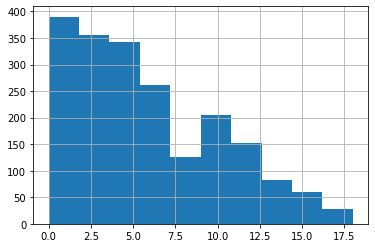

In [6]:
mobile_df['sc_w'].hist()

In [7]:
cnt2 = (mobile_df['px_height']==0).sum()
cnt2

2

<AxesSubplot:>

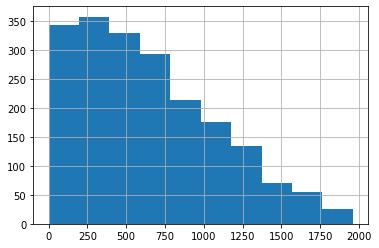

In [8]:
mobile_df['px_height'].hist()

In [9]:
mobile_df = mobile_df[(mobile_df.px_height != 0) & (mobile_df.sc_w != 0)].reset_index()

In [10]:
mobile_df

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,1995,794,1,0.5,1,0,1,2,0.8,106,...,1222,1890,668,13,4,19,1,1,0,0
1815,1996,1965,1,2.6,1,0,0,39,0.2,187,...,915,1965,2032,11,10,16,1,1,1,2
1816,1997,1911,0,0.9,1,1,1,36,0.7,108,...,868,1632,3057,9,1,5,1,1,0,3
1817,1998,1512,0,0.9,0,4,1,46,0.1,145,...,336,670,869,18,10,19,1,1,1,0


In [11]:
mobile_df.info(verbose = True, memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1819 non-null   int64  
 1   battery_power  1819 non-null   int64  
 2   blue           1819 non-null   int64  
 3   clock_speed    1819 non-null   float64
 4   dual_sim       1819 non-null   int64  
 5   fc             1819 non-null   int64  
 6   four_g         1819 non-null   int64  
 7   int_memory     1819 non-null   int64  
 8   m_dep          1819 non-null   float64
 9   mobile_wt      1819 non-null   int64  
 10  n_cores        1819 non-null   int64  
 11  pc             1819 non-null   int64  
 12  px_height      1819 non-null   int64  
 13  px_width       1819 non-null   int64  
 14  ram            1819 non-null   int64  
 15  sc_h           1819 non-null   int64  
 16  sc_w           1819 non-null   int64  
 17  talk_time      1819 non-null   int64  
 18  three_g 

In [12]:
mobile_df.nunique()
#blue,dual_sim,four_g,three_g,touch_screen, wifi and price_range are all categorical
#they are all binary variables, no need to one-hot encoding

index            1819
battery_power    1052
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1070
px_width         1056
ram              1455
sc_h               15
sc_w               18
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [13]:
#get target value
y = mobile_df['price_range']

### Part1.2: Understand the features

In [14]:
#check missing values
mobile_df.isnull().sum()

index            0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
#no duplicated data
mobile_df.duplicated().sum()

0

In [16]:
#Understand Numerical feature
mobile_df.describe()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,...,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,998.379879,1238.031336,0.503573,1.519406,0.504673,4.319956,0.524464,32.156130,0.499835,140.578340,...,647.086861,1252.828477,2133.468939,12.488730,6.338098,11.009346,0.760858,0.507422,0.513469,1.509621
std,576.240108,439.989288,0.500125,0.813975,0.500116,4.355982,0.499538,18.105723,0.288875,35.437231,...,444.741154,432.418889,1087.488721,4.166008,4.153085,5.456642,0.426677,0.500082,0.499956,1.119529
min,0.000000,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,503.500000,845.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,284.000000,877.000000,1203.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,995.000000,1231.000000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,...,562.000000,1251.000000,2175.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1494.500000,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.500000,...,952.000000,1633.000000,3072.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1999.000000,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
#check the feature distribution
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

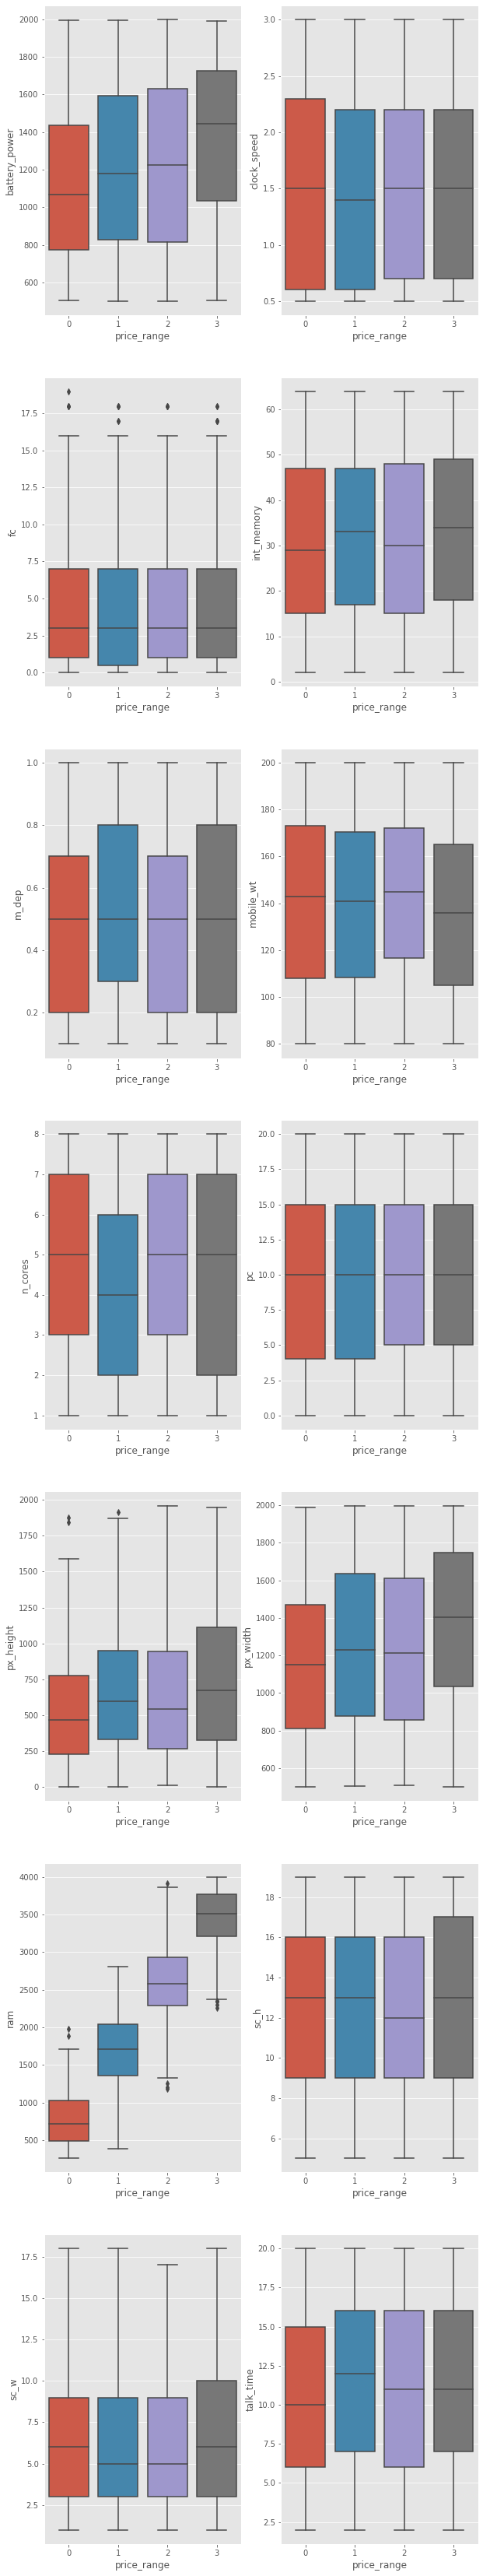

In [19]:
_,axes = plt.subplots(7,2,figsize = [10,60])
sns.boxplot(x = 'price_range', y = 'battery_power', data = mobile_df , ax= axes[0][0])#higher the better
sns.boxplot(x = 'price_range', y = 'clock_speed', data = mobile_df , ax= axes[0][1]) #doesn't seem to be correleated
sns.boxplot(x = 'price_range', y = 'fc',data = mobile_df , ax= axes[1][0]) #have outliers, doesn't seem to be correlated 
sns.boxplot(x = 'price_range', y = 'int_memory',data = mobile_df , ax= axes[1][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'm_dep',data = mobile_df , ax= axes[2][0]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'mobile_wt',data = mobile_df , ax= axes[2][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'n_cores',data = mobile_df , ax= axes[3][0]) # doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'pc',data = mobile_df , ax= axes[3][1]) #seem to be positivey correlated
sns.boxplot(x = 'price_range', y = 'px_height',data = mobile_df , ax= axes[4][0]) # seen to be positively correlated
sns.boxplot(x = 'price_range', y = 'px_width',data = mobile_df , ax= axes[4][1]) #seem to be positively correlated
sns.boxplot(x = 'price_range', y = 'ram',data = mobile_df , ax= axes[5][0])  #higher the beter, exists outlier
sns.boxplot(x = 'price_range', y = 'sc_h',data = mobile_df , ax= axes[5][1]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'sc_w',data = mobile_df , ax= axes[6][0]) #doesn't seem to be correlated
sns.boxplot(x = 'price_range', y = 'talk_time',data = mobile_df , ax= axes[6][1]) #doesn't seem to be correlated
 




<AxesSubplot:>

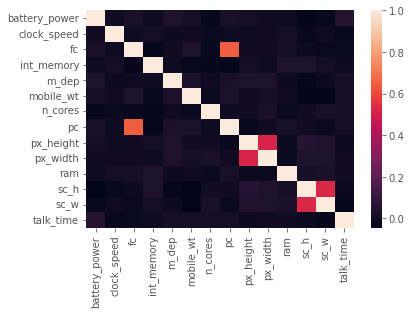

In [20]:
corr_score = mobile_df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',\
                       'pc','px_height','px_width','ram','sc_h','sc_w','talk_time']].corr()
sns.heatmap(corr_score)
#sc and fc, height and weight, which is expectable

In [21]:
corr_score = mobile_df[['fc','pc','px_height','px_width','sc_h','sc_w']].corr()
corr_score


,fc,pc,px_height,px_width,sc_h,sc_w
fc,1.000000,0.645880,-0.001558,-0.004116,-0.012501,-0.017689
pc,0.645880,1.000000,-0.021050,-0.004242,0.000101,-0.019056
px_height,-0.001558,-0.021050,1.000000,0.514228,0.060553,0.043699
px_width,-0.004116,-0.004242,0.514228,1.000000,0.033194,0.035759
sc_h,-0.012501,0.000101,0.060553,0.033194,1.000000,0.524451
sc_w,-0.017689,-0.019056,0.043699,0.035759,0.524451,1.000000


<AxesSubplot:xlabel='price_range', ylabel='count'>

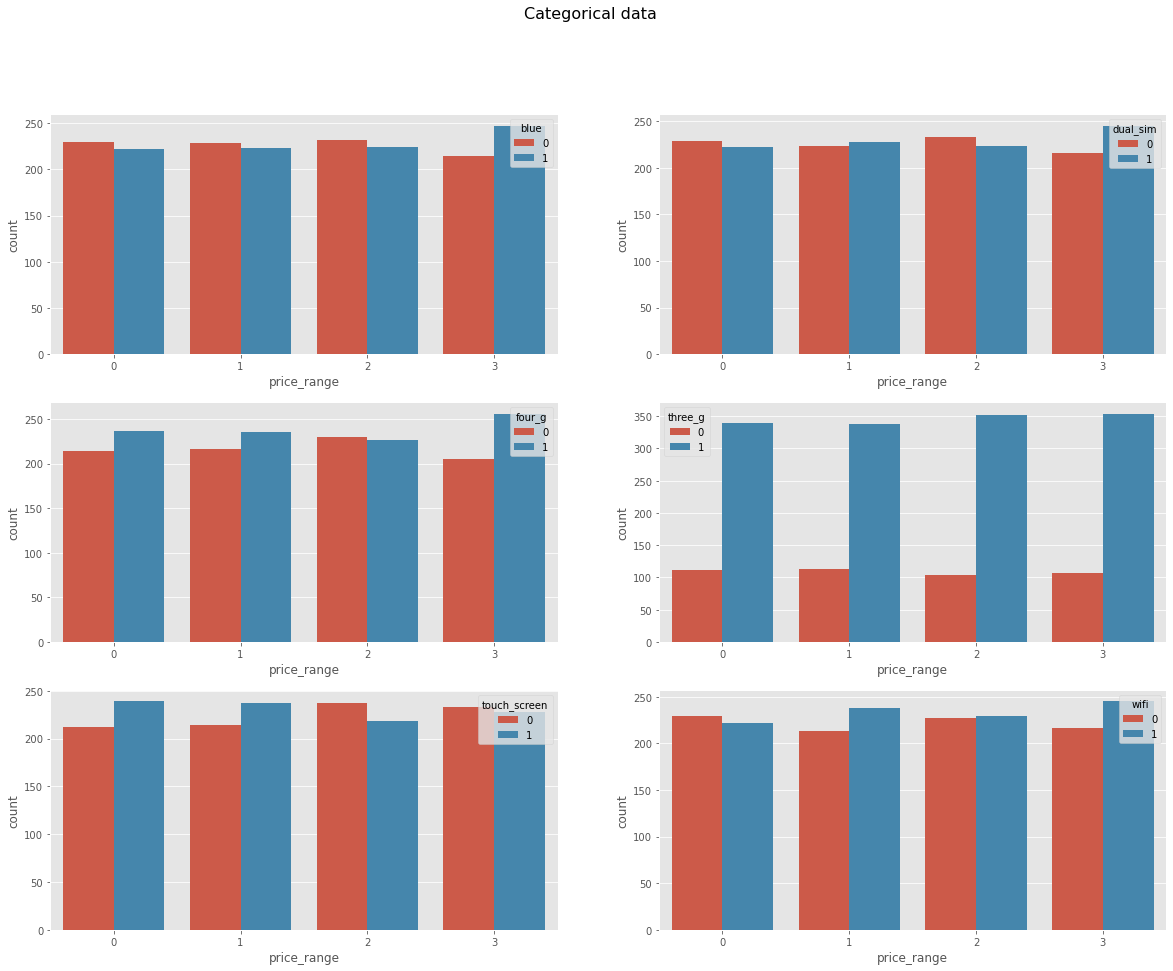

In [22]:
#now understand cateforical feature
#blue,dual_sim,four_g,three_g,touch_screen, wifi and price_range are all categorical
fig,axes = plt.subplots(3,2,figsize = [20,15])
fig.suptitle('Categorical data', fontsize=16)
sns.countplot(x = 'price_range', hue = 'blue', data = mobile_df, ax = axes[0][0])
sns.countplot(x = 'price_range', hue = 'dual_sim', data = mobile_df, ax = axes[0][1])
sns.countplot(x = 'price_range', hue = 'four_g', data = mobile_df, ax = axes[1][0])
sns.countplot(x = 'price_range', hue = 'three_g', data = mobile_df, ax = axes[1][1])
sns.countplot(x = 'price_range', hue = 'touch_screen', data = mobile_df, ax = axes[2][0])
sns.countplot(x = 'price_range', hue = 'wifi', data = mobile_df, ax = axes[2][1])
#bluttooth, dual_sim,four_g  and wifi seems to all favour the mobile pirce to some extent

D:\Anon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, F

<AxesSubplot:xlabel='ram', ylabel='Density'>

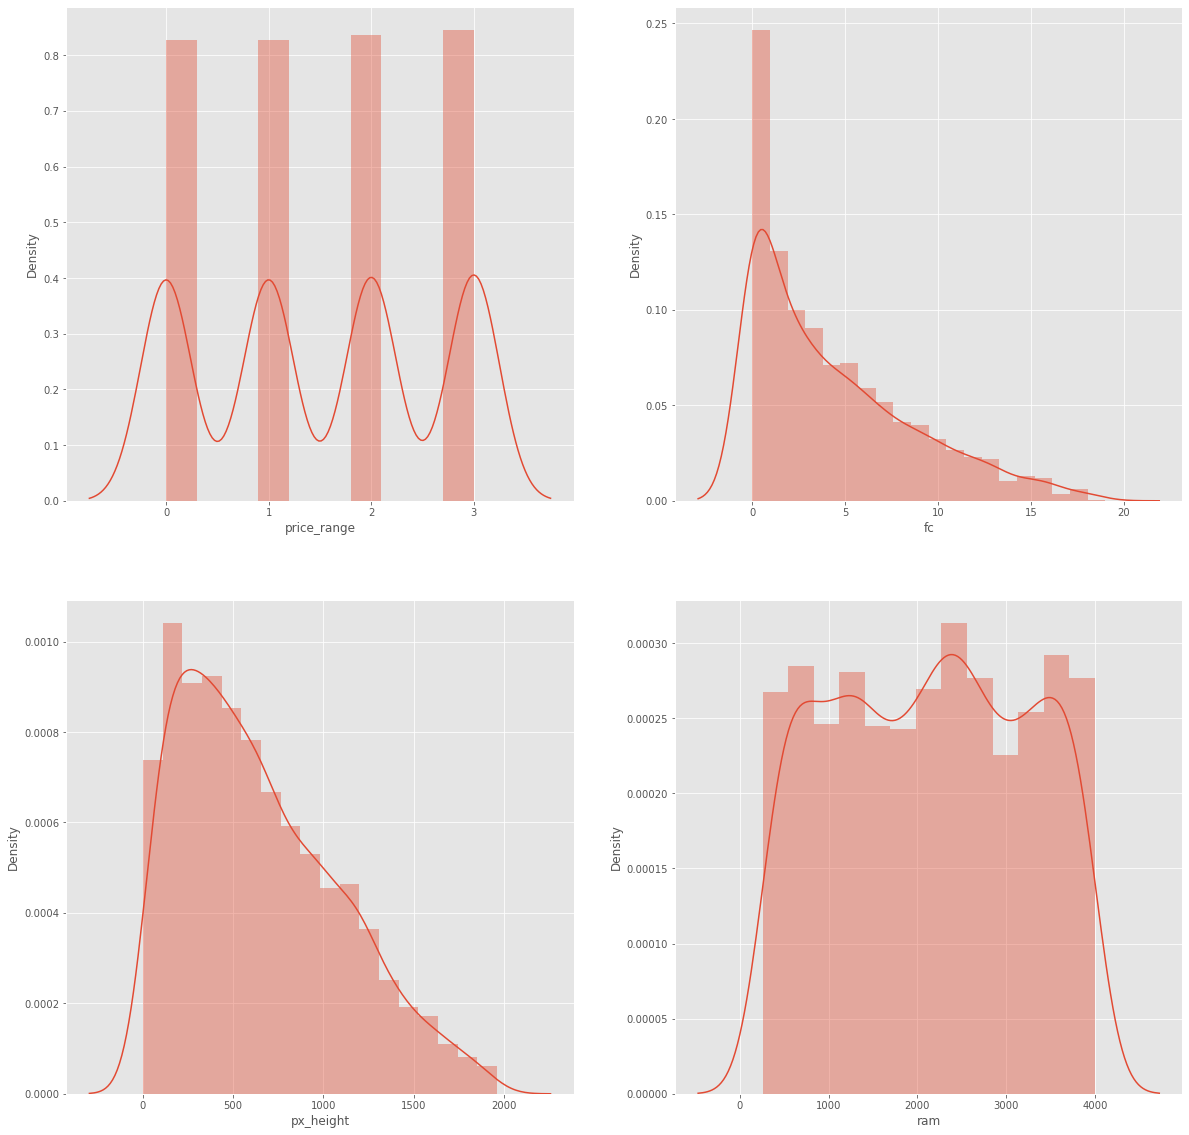

In [23]:
#Check distribution and outlier if we witness outlier point in the previous box plots.
_,axes = plt.subplots(2,2,figsize = [20,20])
sns.distplot(mobile_df.price_range, ax= axes[0][0])#higher the better
sns.distplot(mobile_df.fc, ax= axes[0][1]) #doesn't seem to be correleated
sns.distplot(mobile_df.px_height, ax= axes[1][0]) #have outliers, doesn't seem to be correlated 
sns.distplot(mobile_df.ram, ax= axes[1][1]) #doesn't seem to be correlated

#From the graph we don't think there is a need to handel outlier

## Part 2: Feature Preprocessing

### Part 2.1: Combine Features

In [24]:
#feature combine

#mobile_df['sc_size'] = np.sqrt(mobile_df['sc_h']**2 + mobile_df['sc_w']**2) # 屏幕尺寸
#mobile_df['pixel_size'] = mobile_df['px_height']* mobile_df['px_width'] # 像素尺寸
#to_drop = ['sc_h','sc_w','price_range','px_height','px_width']
to_drop = ['price_range']
X = mobile_df.drop(to_drop, axis = 1)

<AxesSubplot:>

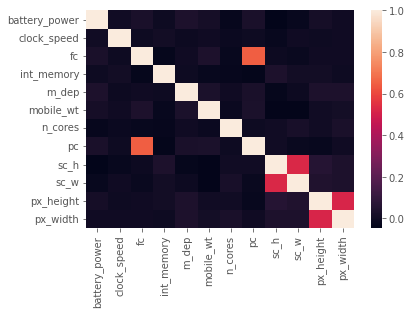

In [25]:
corr_score = X[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',\
                       'pc','sc_h','sc_w','px_height','px_width']].corr()
sns.heatmap(corr_score)

In [26]:
X.head()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,842,0,2.2,0,1,0,7,0.6,188,...,2,20,756,2549,9,7,19,0,0,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,6,905,1988,2631,17,3,7,1,1,0
2,2,563,1,0.5,1,2,1,41,0.9,145,...,6,1263,1716,2603,11,2,9,1,1,0
3,3,615,1,2.5,0,0,0,10,0.8,131,...,9,1216,1786,2769,16,8,11,1,0,0
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,14,1208,1212,1411,8,2,15,1,1,0


In [27]:
X.tail()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1814,1995,794,1,0.5,1,0,1,2,0.8,106,...,14,1222,1890,668,13,4,19,1,1,0
1815,1996,1965,1,2.6,1,0,0,39,0.2,187,...,3,915,1965,2032,11,10,16,1,1,1
1816,1997,1911,0,0.9,1,1,1,36,0.7,108,...,3,868,1632,3057,9,1,5,1,1,0
1817,1998,1512,0,0.9,0,4,1,46,0.1,145,...,5,336,670,869,18,10,19,1,1,1
1818,1999,510,1,2.0,1,5,1,45,0.9,168,...,16,483,754,3919,19,4,2,1,1,1


In [28]:
X.dtypes

index              int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

### Part 2.2 : Split DataSet

In [29]:
cat_cols = X.columns[X.nunique() == 2]
num_cols = X.columns[X.nunique() != 2]

In [30]:
print(num_cols)

Index(['index', 'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')


In [31]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.25, stratify = y, random_state = 1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 1364 observation with 21 features
test data has 455 observation with 21 features


### Part 2.3: Standardize/Normalize Data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

D:\Anon\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anon\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [33]:
X_train.head()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
985,0.154651,0.226379,0,-0.485759,0,1.586185,0,0.273074,0.680813,-0.415613,...,1.705561,1.042764,0.900587,0.019370,-0.600773,-1.296409,-1.285808,1,0,0
408,-0.943677,0.133361,0,-0.733035,0,1.352008,1,-0.386559,1.716074,1.057139,...,0.368942,0.277348,-0.800809,-1.008261,-1.560602,-1.054607,0.004324,1,1,0
589,-0.603718,-0.268208,1,-1.227586,1,-0.755579,0,1.152585,0.335726,-0.557224,...,1.037252,-0.925124,-1.169675,1.381919,-1.320645,-0.812804,1.663065,1,1,0
1041,0.255766,1.571748,0,-0.238483,0,-0.287227,0,-0.441529,1.716074,-1.548499,...,-0.967677,0.524184,0.040668,0.305789,-0.840730,-1.054607,0.741542,1,1,0
1281,0.716018,1.685185,1,-1.227586,1,-0.287227,0,-0.606437,1.025900,-1.293600,...,-0.466445,-1.167430,-1.704532,-0.385094,-0.120858,0.879814,-0.548590,0,0,1


## Part 3: Model Traing and Result Evaluation

### Part3.1:Model Exploration

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


#Logistic Regression
classifier_logistic = LogisticRegression()

#K Nearest Neighbots
classifier_KNN = KNeighborsClassifier()

#Random Forest
classifier_RF = RandomForestClassifier()


In [35]:
#Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression', 'KNN' , 'Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv = 5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1


[0.93772894 0.94139194 0.93040293 0.96336996 0.95955882]
Model accuracy of Logistic Regression is 0.946490519284637
[0.56410256 0.55311355 0.54578755 0.6007326  0.56617647]
Model accuracy of KNN is 0.5659825468648998
[0.85347985 0.83516484 0.85714286 0.84615385 0.84558824]
Model accuracy of Random Forest is 0.8475059254471018


In [36]:
# We see that it seems like logistic regression works best

In [37]:
def draw_mae(model_name,X,y):
    mae_train = []
    mae_test = []
    kf = KFold(n_splits=8)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = model_name
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))
    plt.plot(mae_train, 'o-', color='green', label='train')
    plt.plot(mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(f"{model_name}")
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

D:\Anon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Ano

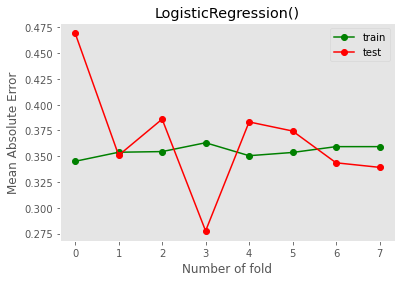

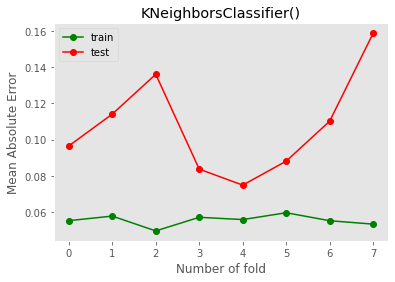

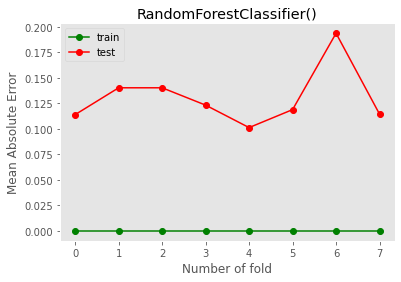

In [38]:
j = 0
for i in model_list: 
    draw_mae(i,X,y)

In [39]:
# We see thatthere is overfitting

In [40]:
#let's analyze feature importance and drop or combine highly correlated features and unimportant features

In [41]:
def test_model(model, X, y):
    mae_train = []
    mae_test = []
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))

    plt.plot(mae_train, 'o-', color='green', label='train')
    plt.plot(mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

### Part 3.2: Feature Preprocessing based on feature importance and overfitting analysis

#### Part 3.2.1: Feature importanc based on L1

In [42]:
#L1
# For L1, remove feature with 0 coff


X_2 = X.copy()
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_2)
for k in range(4):
    print(f'for price_range: {k}')
    for i in range(1,11):
        LRmodel_l1 = LogisticRegression(penalty = 'l1', C = i/10,solver = 'liblinear', random_state = 1)
        LRmodel_l1.fit(X_l1,y)
        indicies = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]
        print("Logistic Regression (L1) Coeffients\n")
        print("C is {}".format(i/10))
        for ind in range(X_2.shape[1]):
            print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l1.coef_[k][indicies[ind]], 4)))

#LRmodel_l1 = LogisticRegression(penalty = 'l1', C = 1,solver = 'liblinear', random_state = 1)
#LRmodel_l1.fit(X_l1,y)

#indicies = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

#print("Logistic Regression (L1) Coeffients")
#for ind in range(X_2.shape[1]):
    #print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l1.coef_[0][indicies[ind]], 4)))

for price_range: 0
Logistic Regression (L1) Coeffients

C is 0.1
ram : -5.7347
battery_power : -1.2833
px_height : -0.8581
px_width : -0.6749
mobile_wt : 0.023
int_memory : -0.0144
wifi : 0.0
blue : 0.0
clock_speed : 0.0
dual_sim : 0.0
fc : 0.0
four_g : 0.0
n_cores : 0.0
m_dep : 0.0
touch_screen : 0.0
pc : 0.0
sc_h : 0.0
sc_w : 0.0
talk_time : 0.0
three_g : 0.0
index : 0.0
Logistic Regression (L1) Coeffients

C is 0.2
ram : -7.8993
battery_power : -1.8425
px_height : -1.1981
px_width : -1.0018
mobile_wt : 0.1372
int_memory : -0.0793
m_dep : -0.027
dual_sim : 0.0243
clock_speed : 0.0199
sc_w : 0.0119
wifi : 0.0
four_g : 0.0
blue : 0.0
fc : 0.0
n_cores : 0.0
touch_screen : 0.0
pc : 0.0
sc_h : 0.0
talk_time : 0.0
three_g : 0.0
index : 0.0
Logistic Regression (L1) Coeffients

C is 0.3
ram : -9.5024
battery_power : -2.2449
px_height : -1.4516
px_width : -1.2354
mobile_wt : 0.2147
int_memory : -0.113
m_dep : -0.0514
dual_sim : 0.0402
sc_w : 0.0381
clock_speed : 0.0332
three_g : 0.0256
wifi :

n_cores : 0.1
fc : 0.0351
four_g : -0.1344
sc_h : -0.084
index : 0.0309
Logistic Regression (L1) Coeffients

C is 0.6
ram : 0.5999
battery_power : -0.017
px_height : 0.0147
px_width : -0.08
mobile_wt : 0.1388
int_memory : -0.0738
three_g : 0.0985
wifi : -0.0357
sc_w : 0.0053
m_dep : -0.0403
dual_sim : -0.0674
clock_speed : 0.0136
blue : -0.0432
touch_screen : -0.0541
talk_time : -0.0155
pc : -0.0126
n_cores : 0.1013
fc : 0.0379
four_g : -0.1368
sc_h : -0.0862
index : 0.0321
Logistic Regression (L1) Coeffients

C is 0.7
ram : 0.6013
battery_power : -0.0177
px_height : 0.0164
px_width : -0.0816
mobile_wt : 0.1397
int_memory : -0.0745
three_g : 0.1002
wifi : -0.0365
sc_w : 0.0067
m_dep : -0.041
dual_sim : -0.0682
blue : -0.0441
talk_time : -0.0161
touch_screen : -0.0549
clock_speed : 0.0143
pc : -0.0147
n_cores : 0.1022
fc : 0.0399
four_g : -0.1385
sc_h : -0.0878
index : 0.0329
Logistic Regression (L1) Coeffients

C is 0.8
ram : 0.6023
battery_power : -0.0183
px_height : 0.0176
px_width :

Logistic Regression (L1) Coeffients


for price_range: 0


ram : -9.5024
battery_power : -2.2449
px_height : -1.4516
px_width : -1.2354
mobile_wt : 0.2147
int_memory : -0.113
m_dep : -0.0514
dual_sim : 0.0402
sc_w : 0.0381
clock_speed : 0.0332
three_g : 0.0256
wifi : 0.0015
fc : 0.0
blue : 0.0
n_cores : 0.0
four_g : 0.0
touch_screen : 0.0
pc : 0.0
sc_h : 0.0
talk_time : 0.0
index : 0.0


for price_range: 1


ram : -0.5622
n_cores : -0.1269
talk_time : 0.0934
m_dep : 0.084
battery_power : -0.063
px_height : 0.0603
clock_speed : -0.057
sc_w : -0.0442
wifi : 0.0413
int_memory : 0.0342
touch_screen : 0.0234
index : 0.0222
dual_sim : 0.0207
px_width : -0.0166
three_g : -0.0099
pc : 0.0
mobile_wt : 0.0
four_g : 0.0
fc : 0.0
sc_h : 0.0
blue : 0.0


for price_range: 2


ram : 0.5902
mobile_wt : 0.1326
four_g : -0.1251
n_cores : 0.095
three_g : 0.0869
sc_h : -0.0777
int_memory : -0.0688
px_width : -0.0687
dual_sim : -0.062
touch_screen : -0.0486
blue : -0.0375
m_dep : -0.035
wifi : -0.0299
inde

D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass 

<AxesSubplot:>

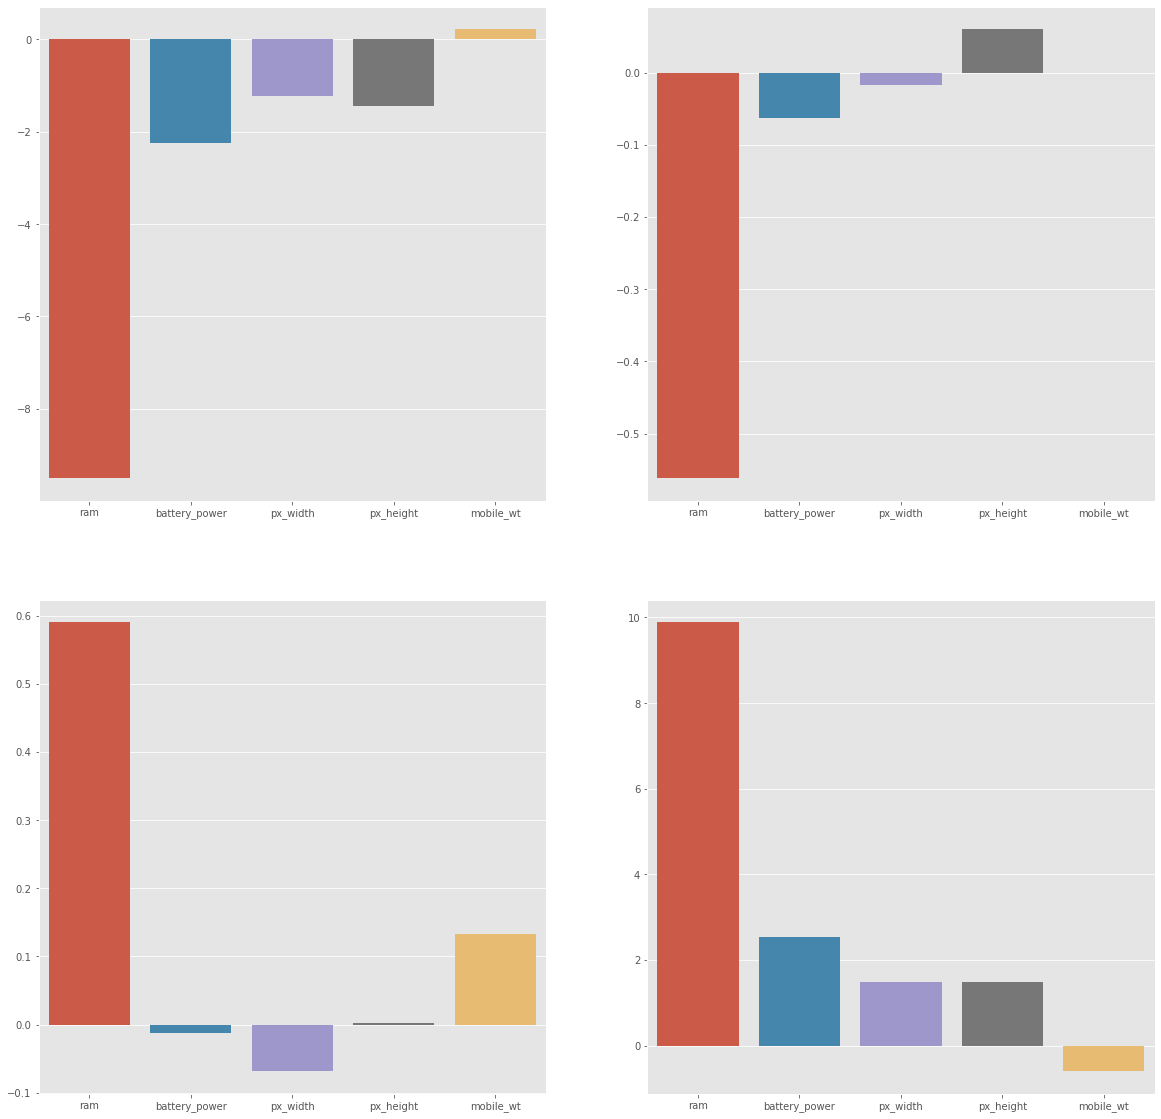

In [43]:
LRmodel_l1 = LogisticRegression(penalty = 'l1', C = 0.3,solver = 'liblinear', random_state = 1)
LRmodel_l1.fit(X_l1,y)

#indicies = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print("Logistic Regression (L1) Coeffients")
for k in range(4):
    print('\n')
    print(f"for price_range: {k}")
    print('\n')
    indicies = np.argsort(abs(LRmodel_l1.coef_[k]))[::-1]
    for ind in range(X_2.shape[1]):
        print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l1.coef_[k][indicies[ind]], 4)))

#fig,ax = plt.subplots(4,1)
#for k in range(4):
#    plt.bar(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[k][indicies[range(5)]],axe = ax[])
    
_,axes = plt.subplots(2,2,figsize = [20,20])
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[0][indicies[range(5)]], ax= axes[0][0])
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[1][indicies[range(5)]], ax= axes[0][1]) 
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[2][indicies[range(5)]], ax= axes[1][0]) 
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l1.coef_[3][indicies[range(5)]], ax= axes[1][1]) 


#### Part 3.2.2: Feature importanc based on L2

In [44]:
#L2
X_2 = X.copy()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_2)
LRmodel_l2 = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'liblinear', random_state = 1)
LRmodel_l2.fit(X_l1,y)

indicies = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print("Logistic Regression (L2) Coeffients")
for ind in range(X_2.shape[1]):
    print("{0} : {1}".format(X_2.columns[indicies[ind]], round(LRmodel_l2.coef_[0][indicies[ind]], 4)))

Logistic Regression (L2) Coeffients
ram : -3.4758
battery_power : -0.8235
px_height : -0.5861
px_width : -0.456
int_memory : -0.094
clock_speed : 0.0832
n_cores : 0.0817
mobile_wt : 0.0785
m_dep : -0.0744
sc_w : 0.0694
talk_time : -0.06
dual_sim : 0.0463
touch_screen : 0.0384
fc : -0.0382
four_g : -0.0302
sc_h : -0.0267
three_g : 0.0261
pc : 0.0259
index : -0.0173
blue : 0.014
wifi : -0.0125


D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass 

<AxesSubplot:>

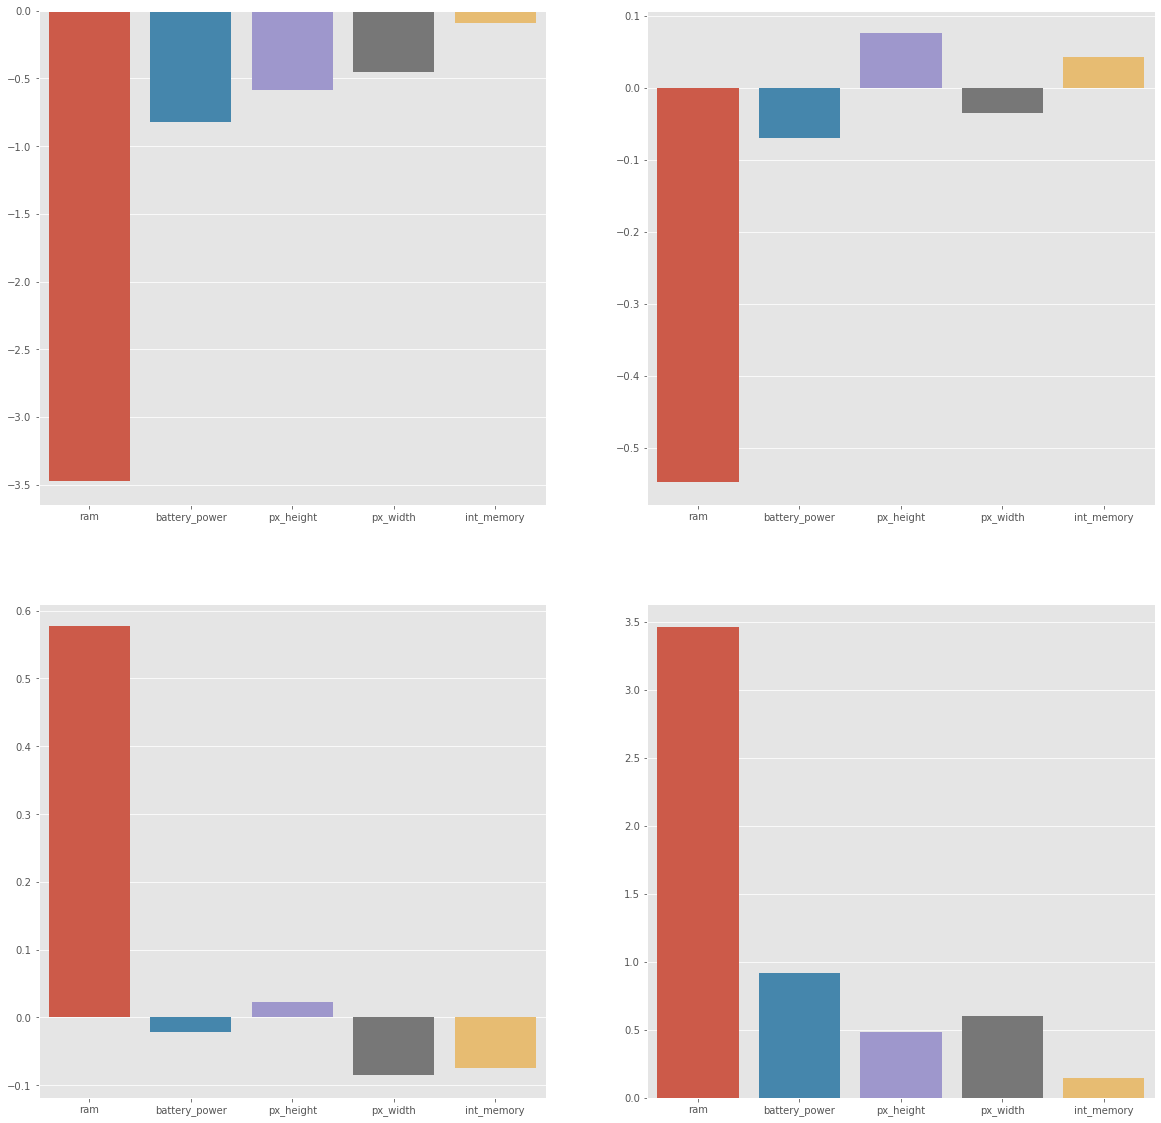

In [45]:
_,axes = plt.subplots(2,2,figsize = [20,20])
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l2.coef_[0][indicies[range(5)]], ax= axes[0][0])
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l2.coef_[1][indicies[range(5)]], ax= axes[0][1]) 
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l2.coef_[2][indicies[range(5)]], ax= axes[1][0]) 
sns.barplot(X_2.columns[indicies[range(5)]],LRmodel_l2.coef_[3][indicies[range(5)]], ax= axes[1][1]) 

#### Part 3.2.3: Feature importanc based on Random Forest

Feature importance ranking by Random Forest Model: 
ram : 0.4716
battery_power : 0.0705
px_width : 0.0561
px_height : 0.0528
mobile_wt : 0.0383
index : 0.0377
int_memory : 0.034
talk_time : 0.0294
pc : 0.0287
sc_w : 0.027
clock_speed : 0.027
sc_h : 0.0261
fc : 0.0233
m_dep : 0.0221
n_cores : 0.0206
touch_screen : 0.0068
dual_sim : 0.0064
wifi : 0.0057
four_g : 0.0057
blue : 0.0055
three_g : 0.0049


D:\Anon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

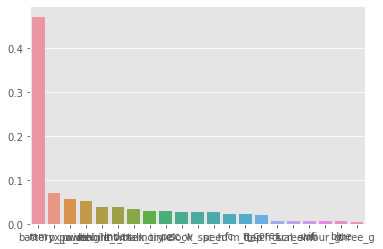

In [46]:
X_RF = X.copy()
forest = RandomForestClassifier()
forest.fit(X_RF,y)

importances = forest.feature_importances_

indicies = np.argsort(importances)[::-1]

print("Feature importance ranking by Random Forest Model: ")
for ind in range(X.shape[1]):
    print("{0} : {1}".format(X_RF.columns[indicies[ind]], round(importances[indicies[ind]],4)))
sns.barplot(X_RF.columns[indicies[range(X.shape[1])]], importances[indicies[range(X.shape[1])]])

<Figure size 1600x1600 with 0 Axes>

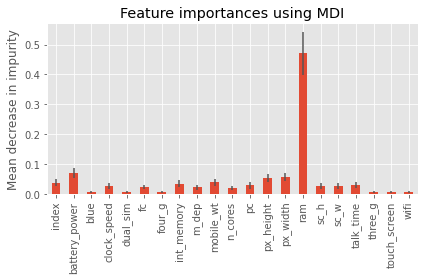

In [47]:
from matplotlib.pyplot import figure

figure(figsize=(20, 20), dpi=80)
importances = forest.feature_importances_

forest_importances = pd.Series(importances,index=X_RF.columns)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [48]:
dict(forest_importances)

{'index': 0.0377381299887041,
 'battery_power': 0.07045056788257123,
 'blue': 0.005485930997226409,
 'clock_speed': 0.026962753135434378,
 'dual_sim': 0.006367678710262044,
 'fc': 0.023263290977771994,
 'four_g': 0.005706030969914765,
 'int_memory': 0.03398231861269284,
 'm_dep': 0.02206531547808628,
 'mobile_wt': 0.03827948761204244,
 'n_cores': 0.02055192754612632,
 'pc': 0.028698118942840495,
 'px_height': 0.05280377002730729,
 'px_width': 0.05607910541509443,
 'ram': 0.4715730574577831,
 'sc_h': 0.026115871554250786,
 'sc_w': 0.026993627920631282,
 'talk_time': 0.02936810670367478,
 'three_g': 0.0049445909935523355,
 'touch_screen': 0.006845993974997269,
 'wifi': 0.005724325099035368}

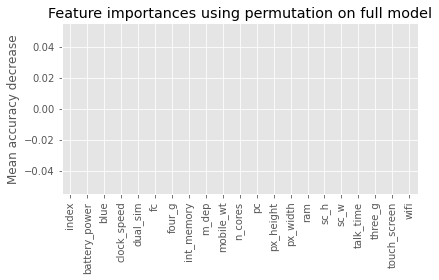

In [49]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    forest, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
forest_importances2 = pd.Series(result.importances_mean, index=X_RF.columns)
fig, ax = plt.subplots()
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [50]:
forest_importances2

index            0.0
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64

In [51]:
# importance

<AxesSubplot:>

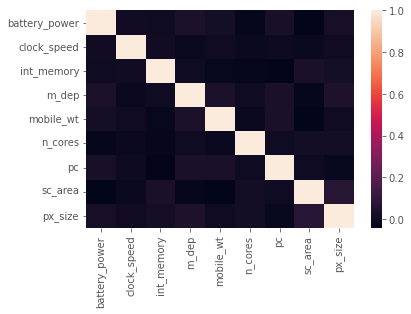

In [52]:
# We decide to drop sc_h and sc_w, wifi, three_g, four_g
# combine sc_h, sc_w and px_height, px_width
#They all all deemed unimportant, unlike dual_sim, battery power etc
mobile_df['sc_area'] = np.sqrt(mobile_df['sc_h'] ** 2 + mobile_df['sc_w'] ** 2)
mobile_df['px_size'] = mobile_df['px_height'] * mobile_df['px_width']
mobile_df.drop(columns = ['sc_h','sc_w','wifi','three_g','four_g'], inplace = True)
corr_score = mobile_df[['battery_power','clock_speed','int_memory','m_dep','mobile_wt','n_cores',\
                       'pc','sc_area','px_size']].corr()
sns.heatmap(corr_score)



In [53]:
X_train_original = X_train.copy()
X_test_origianl  = X_test.copy()

X_test['sc_area'] = np.sqrt(X_test['sc_h'] ** 2 + X_test['sc_w'] ** 2)
X_test['px_size'] = X_test['px_height'] * X_test['px_width']
X_test.drop(columns = ['sc_h','sc_w','wifi','three_g','four_g','fc','pc','px_height','px_width'], inplace = True)

X_train['sc_area'] = np.sqrt(X_train['sc_h'] ** 2 + X_train['sc_w'] ** 2)
X_train['px_size'] = X_train['px_height'] * X_train['px_width']
X_train.drop(columns = ['sc_h','sc_w','wifi','three_g','four_g','fc','pc','px_height','px_width'], inplace = True)

X['sc_area'] = np.sqrt(X['sc_h'] ** 2 + X['sc_w'] ** 2)
X['px_size'] = X['px_height'] * X['px_width']
X.drop(columns = ['sc_h','sc_w','wifi','three_g','four_g','fc','pc','px_height','px_width'], inplace = True)

C:\Users\lzabr\AppData\Local\Temp/ipykernel_13984/613459153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['sc_area'] = np.sqrt(X_test['sc_h'] ** 2 + X_test['sc_w'] ** 2)
C:\Users\lzabr\AppData\Local\Temp/ipykernel_13984/613459153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['px_size'] = X_test['px_height'] * X_test['px_width']
D:\Anon\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [54]:
X_train.columns

Index(['index', 'battery_power', 'blue', 'clock_speed', 'dual_sim',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time',
       'touch_screen', 'sc_area', 'px_size'],
      dtype='object')

### Part 3.3: Grid Search to Find Optimal Hyperparameters

In [55]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(gs):
    print("Best score: "+ str(gs.best_score_))
    print('Best parameters sets:')
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ":" + str(best_parameters[param_name]))

#### Part 3.2.1: Logistic Regression

In [56]:
parameters = {
    'penalty':('l1', 'l2'),
    'C':np.linspace(0,1,5)
}
Grid_LR = GridSearchCV(LogisticRegression(solver = 'liblinear'), parameters, cv=5)
Grid_LR.fit(X_train, y_train)

D:\Anon\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anon\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anon\lib\site-packages\sklearn\linear_model\_logistic.py", line 1358, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "D:\Anon\lib\site-packages\sklearn\svm\_base.py", line 975, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anon\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these

D:\Anon\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.75955882 0.73903254 0.76176201 0.74563402
 0.75956421 0.75150022 0.76249731 0.75150022]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ('l1', 'l2')})

In [57]:
print_grid_search_metrics(Grid_LR)

Best score: 0.7624973066149536
Best parameters sets:
C:1.0
penalty:l1


In [58]:
#best model
best_LR_model = Grid_LR.best_estimator_

In [59]:
best_LR_model.predict(X_test)

array([2, 2, 3, 3, 1, 2, 2, 1, 3, 3, 2, 0, 1, 2, 1, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 3, 2,
       1, 3, 3, 1, 0, 3, 1, 3, 0, 2, 2, 2, 0, 2, 2, 3, 2, 2, 3, 0, 3, 1,
       0, 2, 0, 2, 2, 0, 2, 3, 3, 1, 0, 1, 0, 1, 0, 3, 3, 0, 2, 3, 3, 2,
       1, 1, 2, 2, 3, 1, 3, 3, 3, 0, 2, 1, 0, 0, 3, 0, 1, 0, 2, 3, 0, 3,
       3, 0, 3, 1, 2, 0, 0, 3, 0, 3, 2, 2, 3, 1, 2, 3, 1, 0, 3, 2, 2, 0,
       1, 2, 3, 0, 2, 2, 0, 3, 1, 3, 2, 2, 1, 3, 0, 1, 2, 2, 1, 1, 3, 0,
       3, 1, 0, 3, 2, 3, 3, 1, 0, 1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 3, 0, 3, 2, 1, 3, 0, 2, 3,
       0, 0, 3, 1, 2, 2, 3, 0, 0, 1, 3, 2, 0, 3, 3, 0, 3, 1, 3, 0, 3, 1,
       2, 2, 1, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       3, 3, 2, 0, 3, 2, 0, 2, 0, 1, 3, 2, 1, 1, 0, 0, 2, 1, 3, 1, 3, 0,
       1, 1, 3, 0, 1, 3, 3, 2, 3, 3, 0, 1, 0, 0, 3, 2, 2, 3, 1, 0, 1, 3,
       3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1, 2, 0, 1,

In [60]:
best_LR_model.score(X_test,y_test) #not underfitting, not overfitting, no obvious difference

0.7582417582417582

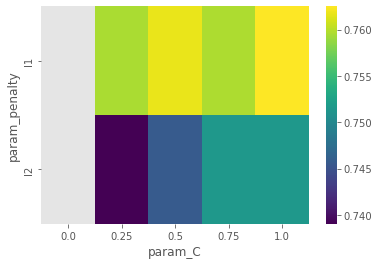

In [61]:
# L1 is better / L2 ; when C = 1.0
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index = 'param_penalty', columns = 'param_C', values ='mean_test_score'))
_=sns.heatmap(res,cmap = 'viridis')

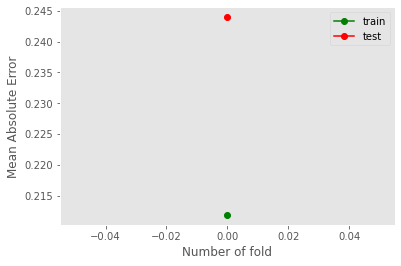

In [62]:
test_model(best_LR_model, X_test, y_test)

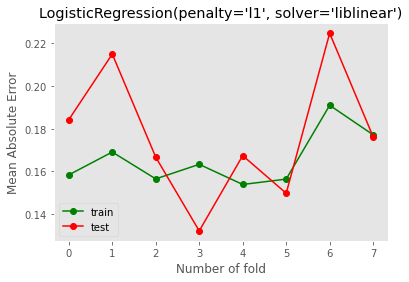

In [63]:
draw_mae(best_LR_model, X, y)

#### Part 3.2.2 : KNN

In [64]:
parameters = {'n_neighbors': [i for i in range(1,45,2)]}
Grid_KNN =  GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43]})

In [65]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.6796299288946348
Best parameters sets:
n_neighbors:43


In [66]:
best_KNN_model = Grid_KNN.best_estimator_

In [67]:
best_KNN_model.predict(X_test)

array([2, 2, 2, 3, 1, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 1, 0, 3, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 3, 2,
       1, 3, 3, 3, 0, 2, 1, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 0, 3, 1,
       0, 2, 0, 1, 2, 0, 2, 3, 3, 1, 0, 0, 0, 3, 1, 3, 3, 0, 3, 3, 2, 3,
       1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 2, 2, 1, 0, 3, 0, 1, 0, 1, 3, 0, 2,
       3, 0, 2, 0, 1, 1, 0, 2, 0, 3, 3, 1, 3, 1, 2, 2, 2, 0, 3, 2, 3, 0,
       1, 1, 3, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 3, 0,
       2, 2, 0, 3, 0, 3, 3, 1, 0, 0, 0, 1, 1, 1, 0, 2, 3, 0, 1, 0, 2, 1,
       0, 3, 2, 1, 1, 2, 1, 2, 2, 1, 3, 2, 2, 2, 0, 2, 2, 1, 3, 0, 2, 2,
       0, 0, 3, 1, 2, 2, 3, 0, 0, 2, 3, 2, 0, 2, 3, 0, 2, 0, 3, 0, 3, 1,
       2, 1, 1, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 1, 3, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 3, 2, 0, 2, 0, 1, 3, 1, 1, 1, 0, 0, 2, 1, 3, 1, 3, 0,
       0, 1, 3, 0, 1, 3, 2, 2, 3, 2, 0, 2, 1, 0, 3, 2, 3, 3, 1, 1, 0, 3,
       3, 1, 2, 3, 0, 3, 1, 2, 2, 2, 3, 2, 2, 0, 0,

In [68]:
best_KNN_model.score(X_test,y_test)

0.6967032967032967

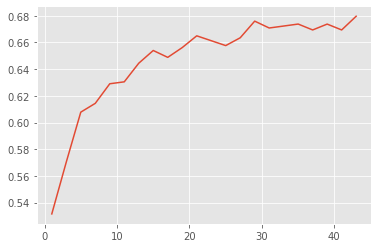

In [69]:
KNN_models = pd.DataFrame(Grid_KNN.cv_results_)
plt.plot(KNN_models['param_n_neighbors'],KNN_models['mean_test_score'])

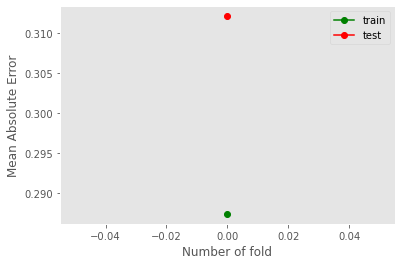

In [70]:
test_model(best_KNN_model, X_test, y_test)

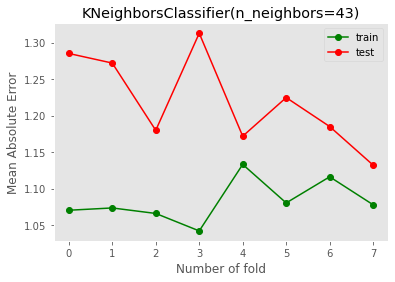

In [71]:
draw_mae(best_KNN_model, X, y)
#IMPROVE 

#### Part 3.2.3 : Random Forest


In [ ]:
parameters = { 
    'n_estimators': [60,80,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,4,5,10],
    'criterion' :['gini', 'entropy']
}
Grid_RF =  GridSearchCV(RandomForestClassifier(),parameters,cv=5,verbose=True)
Grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [ ]:
print_grid_search_metrics(Grid_RF)

In [ ]:
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model.predict(X_test)

In [ ]:
best_RF_model.score(X_test,y_test)

In [ ]:
test_model(best_RF_model, X_test, y_test)

In [ ]:
draw_mae(best_RF_model, X, y)

### Part 3.4: Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier,cm):
    tn = cm[0][0]
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    accuracy = (tp + tn)/ (tp + fp + fn + tn + 0.0)
    precision = tp/ (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print('Accuracy is: ' + str(accuracy))
    print('Precision is: ' + str(precision))
    print('Recall is: ' + str(recall))
    print()
    
    
def draw_confusion_matrices(confusion_matrices):
    for cm in confusion_matrices:
        classifier,cm = cm[0],cm[1]
        cal_evaluation(classifier,cm)

In [ ]:
confusion_matrices = [
    ("Before: Random Forest", confusion_matrix(y_test,model_list[2].predict(X_test_origianl))),
    ("Before: Logistic Regression", confusion_matrix(y_test,model_list[0].predict(X_test_origianl))),
    ("Before: K nearest neighbor", confusion_matrix(y_test,model_list[1].predict(X_test_origianl)))
    #,("Gradient Boosting", confusion_matrix(y_test,best_GB_model.predict(X_test)))
]
draw_confusion_matrices(confusion_matrices)

# Combine defintion of cm scores

In [ ]:
confusion_matrices = [
    ("After: Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("After: Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("After : K nearest neighbor", confusion_matrix(y_test,best_KNN_model.predict(X_test)))
    #,("Gradient Boosting", confusion_matrix(y_test,best_GB_model.predict(X_test)))
]
draw_confusion_matrices(confusion_matrices)

# Combine defintion of cm scores

Conclusion

Don't need to delete for random forest, just do hyperparameter tunning

For logistic, both score improvement and less overfitting

For KNN, just use the original data